# Nanodegree Engenheiro de Machine Learning
## Projeto final
Arthur Pimenta 
28 de maio de 2019

## I. Definição
_(aprox. 1-2 páginas)_

### Visão geral do projeto
Nesta seção, procure fornecer uma visão de alto nível do projeto em linguagem simples. Questões para se perguntar ao escrever esta seção:
- _Foi fornecido um resumo do projeto final, bem como o domínio do problema, a origem do projeto e o conjunto de dados ou entradas?_
- _Foram dadas informações suficientes sobre o contexto para que um leitor desinformado possa entender o domínio e a enunciação problema?_

### Descrição do problema
Nesta seção, você irá definir o problema que você está tentando resolver de forma clara, incluindo a estratégia (resumo das tarefas) que você irá utilizar para alcançar a solução desejada. Você deverá também discutir detalhadamente qual será a solução pretendida para este problema. Questões para se perguntar ao escrever esta seção:
- _A enunciação do problema foi claramente definida? O leitor irá entender o que você está esperando resolver?_
- _Você discutiu detalhadamente como irá tentar resolver o problema?_
- _A solução antecipada está claramente definida? O leitor entenderá quais resultados você está procurando?_

### Métricas
Nesta seção, você precisará definir claramente as métricas ou cálculos que você irá usar para avaliar o desempenho de um modelo ou resultado no seu projeto. Esses cálculos e métricas devem ser justificadas baseado nas características do problema e domínio do problema. Questões para se perguntar ao escrever esta seção:
- _As métricas que você escolheu para medir o desempenho de seus modelos foram discutidas e definidas de forma clara?_
- _Você forneceu justificativas razoáveis para as métricas escolhidas, baseando-se no problema e solução?_

## II. Análise
_(aprox. 2-4 páginas)_

### Exploração dos dados
Nesta seção, é esperado que você analise os dados que você está usando para o problema. Esses dados podem ser tanto na forma de um conjunto de dados (ou conjuntos de dados), dados de entrada (ou arquivos de entrada), ou até um ambiente. O tipo de dados deve ser descrito detalhadamente e, se possível, ter estatísticas e informações básicas apresentadas (tais como discussão dos atributos de entrada ou definição de características das entradas ou do ambiente) Qualquer anormalidade ou qualidade interessante dos dados que possam precisar ser devidamente tratadas devem ser identificadas (tais como características que precisem ser transformadas ou a possibilidade de valores atípicos) Questões para se perguntar ao escrever esta seção:
- _Se exite um conjunto de dados para o problema em questão, você discutiu totalmente as características desse conjunto? Uma amostra dos dados foi oferecida ao leitor?_
- _Se existe um conjunto de dados para o problema, as estatísticas sobre eles foram calculadas e reportadas? Foram discutidos quaisquer resultados relevantes desses cálculos?_
- _Se **não** existe um conjunto de dados para o problema, foi realizada uma discussão sobre o espaço de entrada ou os dados de entrada do problema?_
- _Existem anormalidades ou características acerca do espaço de entrada ou conjunto de dados que necessitem ser direcionados? (variáveis categóricas, valores faltando, valores atípicos, etc.)_

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
# Dados de treino
df_train = pd.read_csv("../../quora-question-pairs/input/train.csv")
print(df_train.shape)

(404290, 6)


In [3]:
df_train.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [4]:
# Dados faltantes
null_columns = df_train.columns[df_train.isnull().any()]
values = df_train[null_columns].isnull().sum()

for c, v in zip(null_columns, values):
    print('Coluna: {}, Valores faltantes: {}'.format(c, v))

Coluna: question1, Valores faltantes: 1
Coluna: question2, Valores faltantes: 2


In [5]:
df_train.fillna('', inplace=True)

In [ ]:
c = Counter()
c.update(df_train['qid1'].values)
c.update(df_train['qid2'].values)


In [6]:
c = Counter()
c.update(df_train['qid1'].values)
c.update(df_train['qid2'].values)

print('Número de perguntas que aparecem mais de uma vez: {}'.format(np.sum(np.array(list(c.values())) > 1)))

print('Número de perguntas: {}'.format(len(c)))

Número de perguntas que aparecem mais de uma vez: 111780
Número de perguntas: 537933


In [7]:
# Percentual de pares duplicadas na base de dados
duplicate_group = df_train.groupby('is_duplicate')['id'].count()
print('Perguntas duplicadas {}'.format(duplicate_group))

Perguntas duplicadas is_duplicate
0    255027
1    149263
Name: id, dtype: int64


In [8]:
print('Percentual de pares duplicados: {:.4f}%'.format(duplicate_group[1] / (duplicate_group.sum())))

Percentual de pares duplicados: 0.3692%


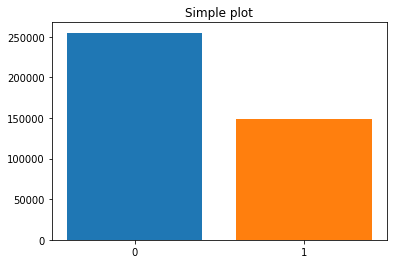

In [9]:
fig, ax = plt.subplots()
ax.bar('0', duplicate_group[0])
ax.bar('1', duplicate_group[1])
ax.set_title('Simple plot')
plt.show()

In [10]:
questions = pd.concat([df_train['question1'], df_train['question2']], axis=0)
questions.shape

(808580,)

In [11]:
df_train.drop(['id', 'qid1', 'qid2'], inplace=True, axis=1)

In [61]:
df_train.head()

,question1,question2,is_duplicate
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [12]:
for i in range(5):
    print(df_train.iloc[i].question1)
    print(df_train.iloc[i].question2)
    print()

What is the step by step guide to invest in share market in india?
What is the step by step guide to invest in share market?

What is the story of Kohinoor (Koh-i-Noor) Diamond?
What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?

How can I increase the speed of my internet connection while using a VPN?
How can Internet speed be increased by hacking through DNS?

Why am I mentally very lonely? How can I solve it?
Find the remainder when [math]23^{24}[/math] is divided by 24,23?

Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?
Which fish would survive in salt water?



In [65]:
from gensim.parsing.preprocessing import *
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
words = ['what', 'which', 'who', 'whom', 'when', 'where', 'why', 'how']
for w in words:
    stop_words.remove(w)

def question_preprocessing(question):
    question = question.lower()
    question = strip_punctuation(question)
    question = strip_numeric(question)
    question = strip_non_alphanum(question)
    question = strip_multiple_whitespaces(question)
    question = [w for w in question.split() if not w in stop_words]
    question = " ".join(question)
    question = strip_short(question, minsize=3)
    question = stem_text(question)
    
    return question

In [66]:
for i in range(5):
    print(text_preprocessing_gensim(df_train.iloc[i].question1))
    print(text_preprocessing_gensim(df_train.iloc[i].question2))
    print()

what step step guid invest share market india
what step step guid invest share market

what stori kohinoor koh noor diamond
what would happen indian govern stole kohinoor koh noor diamond back

how increas speed internet connect us vpn
how internet speed increas hack dn

why mental lone how solv
find remaind when math math divid

which on dissolv water quikli sugar salt methan carbon oxid
which fish would surviv salt water



In [81]:
df_train.head()

,question1,question2,is_duplicate
0,what step step guid invest share market india,what step step guid invest share market,0
1,what stori kohinoor koh noor diamond,what would happen indian govern stole kohinoor...,0
2,how increas speed internet connect us vpn,how internet speed increas hack dn,0
3,why mental lone how solv,find remaind when math math divid,0
4,which on dissolv water quikli sugar salt metha...,which fish would surviv salt water,0


In [68]:
df_train.question1 = df_train.question1.map(lambda q: question_preprocessing(q))
df_train.question2 = df_train.question2.map(lambda q: question_preprocessing(q))

In [124]:
df_is_duplicate = df_train[df_train['is_duplicate'] == 1]
df_is_not_duplicate = df_train[df_train['is_duplicate'] == 0]

In [336]:
df_train_balanced = pd.concat([df_is_duplicate[:2000], df_is_not_duplicate[:2000]])
df_train_balanced.shape

(4000, 3)

In [337]:
questions = pd.Series(pd.concat([df_train_balanced.question1, df_train_balanced.question2], axis=0).unique())

In [338]:
questions.shape

(7525,)

In [339]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vectorizer.fit(questions)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [340]:
import scipy as sp

def dist_norm(v1, v2):
    v1_normalized = v1/sp.linalg.norm(v1.toarray())
    v2_normalized = v2/sp.linalg.norm(v2.toarray())
    delta = v1_normalized - v2_normalized
    return sp.linalg.norm(delta.toarray())

In [341]:
from scipy.spatial import distance

is_duplicate_dists = []
is_not_duplicate_dists = []

for i in range(df_train_balanced.shape[0]//2):
    q1 = df_is_duplicate.iloc[i].question1
    q2 = df_is_duplicate.iloc[i].question2
    q1 = vectorizer.transform([q1])
    q2 = vectorizer.transform([q2])
    is_duplicate_dists.append(distance.sqeuclidean(q1.toarray(), q2.toarray()))
    
    q1 = df_is_not_duplicate.iloc[i].question1
    q2 = df_is_not_duplicate.iloc[i].question2
    q1 = vectorizer.transform([q1])
    q2 = vectorizer.transform([q2])
    is_not_duplicate_dists.append(distance.sqeuclidean(q1.toarray(), q2.toarray()))    

In [342]:
# normalizando euclidian dists
from sklearn.preprocessing import normalize

highest_dist = np.max(np.array(is_duplicate_dists + is_not_duplicate_dists))

x1 = np.array(is_duplicate_dists)
x1 = x1/highest_dist

x2 = np.array(is_not_duplicate_dists)
x2 = x2/highest_dist

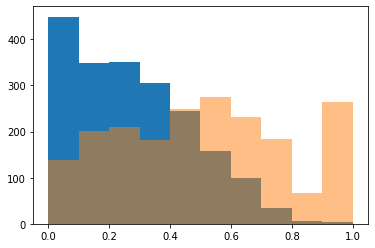

In [343]:
bins = [0, .1, .2, .3, .4, .5, .6 , .7, .8, .9, 1]
bins2 = [0, .2, .4, .6 , .8, 1]

plt.hist(x1, bins = bins)
plt.hist(x2, bins = bins, alpha = 0.5)

plt.show()

In [108]:
for i in range(10):
    q1 = duplicated_questions.iloc[i].question1
    q2 = duplicated_questions.iloc[i].question2
    print(q1)
    print(q2)
    print(duplicated_questions.iloc[i].is_duplicate)
    q1 = vectorizer.transform([q1])
    q2 = vectorizer.transform([q2])
    print(dist_norm(q1, q2))
    print()

astrolog capricorn sun cap moon cap rise what sai
tripl capricorn sun moon ascend capricorn what sai
1
1.0092848393147544

how good geologist
what great geologist
1
0.6451836160108996

how read find youtub comment
how see youtub comment
1
0.7879166525166733

what make physic easi learn
how make physic easi learn
1
0.2553585594091951

what first sexual experi like
what first sexual experi
1
0.3545429055606367

what would trump presid mean current intern master student visa
how trump presid affect student present plan studi
1
1.1497379374487329

what manipul mean
what manipul mean
1
0.0

why mani quora user post question readili answer googl
why peopl ask quora question which answer easili googl
1
1.0582491499675533

why rocket look white
why rocket booster paint white
1
0.8958013831326762

how prepar final law
how on know complet prepar final exam
1
0.9590457874696703



In [106]:
for i in range(10):
    q1 = non_duplicated_questions.iloc[i].question1
    q2 = non_duplicated_questions.iloc[i].question2
    print(q1)
    print(q2)
    print(non_duplicated_questions.iloc[i].is_duplicate)
    q1 = vectorizer.transform([q1])
    q2 = vectorizer.transform([q2])
    print(dist_norm(q1, q2))
    print()

what step step guid invest share market india
what step step guid invest share market
0
0.21350013242800242

what stori kohinoor koh noor diamond
what would happen indian govern stole kohinoor koh noor diamond back
0
0.6760369929609276

how increas speed internet connect us vpn
how internet speed increas hack dn
0
1.0175495688785492

why mental lone how solv
find remaind when math math divid
0
1.4142135623730951

which on dissolv water quikli sugar salt methan carbon oxid
which fish would surviv salt water
0
1.200489108125115

bui tiago
what keep childern activ far phone video game
0
1.414213562373095

when us instead
when us instead
0
0.0

motorola compani hack charter motorolla dcx
how hack motorola dcx free internet
0
0.8502500745526534

method find separ slit us fresnel biprism
what thing technician tell durabl reliabl laptop compon
0
1.4142135623730951

what law chang statu student visa green card how compar immigr law canada
what law chang statu student visa green card how compar

In [235]:
# questions_ordered = {}

# index=0
# for i in range(0, 1000):
#     questions_ordered[index] = df_train.iloc[i]['question1']
#     questions_ordered[index+1] = df_train.iloc[i]['question2']
#     index+=2
# len(questions_ordered)

In [236]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# import nltk.stem

# english_stemmer = nltk.stem.SnowballStemmer('english')
# class StemmedTfidfVectorizer(TfidfVectorizer):
#     def build_analyzer(self):
#         analyzer = super(TfidfVectorizer, self).build_analyzer()
#         return lambda doc: (english_stemmer.stem(w) for w in analyzer(doc))

In [11]:
# vectorizer = StemmedTfidfVectorizer(min_df=1, 
#                                     stop_words='english', 
#                                     decode_error='ignore')
# X_train = vectorizer.fit_transform(questions[:10000].values)
# num_samples, num_features = X_train.shape
# print("samples: %d, features: %d" % (num_samples, num_features))

In [12]:
# from sklearn.metrics.pairwise import euclidean_distances

# for i in range(0, num_samples, 2):
#     dist = euclidean_distances( X_train.getrow(i),  X_train.getrow(i+1))
# #     print(f'questions {i} : {i+1}, dist: {dist}')

### Visualização exploratória
Nesta seção, você precisará fornecer alguma forma de visualização que sintetize ou evidencie uma característica ou atributo relevante sobre os dados. A visualização deve sustentar adequadamente os dados utilizados. Discuta por que essa visualização foi escolhida e por que é relevante. Questões para se perguntar ao escrever esta seção:
- _Você visualizou uma característica ou um atributo relevante acerca do conjunto de dados ou dados de entrada?_
- _A visualização foi completamente analisada e discutida?_
- _Se um gráfico foi fornecido, os eixos, títulos e dados foram claramente definidos?_

### Algoritmos e técnicas
Nesta seção, você deverá discutir os algoritmos e técnicas que você pretende utilizar para solucionar o problema. Você deverá justificar o uso de cada algoritmo ou técnica baseado nas características do problema e domínio do problema. Questões para se perguntar ao escrever esta seção:
- _Os algoritmos que serão utilizados, incluindo quaisquer variáveis/parâmetros padrão do projeto, foram claramente definidos?_
- _As técnicas a serem usadas foram adequadamente discutidas e justificadas?_
- _Ficou claro como os dados de entrada ou conjuntos de dados serão controlados pelos algoritmos e técnicas escolhidas?_

### Benchmark
Nesta  seção, você deverá definir claramente um resultado de referência (benchmark) ou limiar para comparar entre desempenhos obtidos pela sua solução. O raciocínio por trás da referência (no caso onde não é estabelecido um resultado) deve ser discutido. Questões para se perguntar ao escrever esta seção:
- _Algum resultado ou valor que funcione como referência para a medida de desempenho foi fornecido?_
- _Ficou claro como esse resultado ou valor foi obtido (seja por dados ou por hipóteses)?_

## III. Metodologia
_(aprox. 3-5 páginas)_

### Pré-processamento de dados
Nesta seção, você deve documentar claramente todos os passos de pré-processamento que você pretende fazer, caso algum seja necessário. A partir da seção anterior, quaisquer anormalidades ou características que você identificou no conjunto de dados deverão ser adequadamente direcionadas e tratadas aqui. Questões para se perguntar ao escrever esta seção:
- _Se os algoritmos escolhidos requerem passos de pré-processamento, como seleção ou transformações de atributos, tais passos foram adequadamente documentados?_
- _Baseado na seção de **Exploração de dados**, se existiram anormalidade ou características que precisem ser tratadas, elas foram adequadamente corrigidas?_
- _Se não é necessário um pré-processamento, foi bem definido o porquê?_

### Implementação
Nesta seção, o processo de escolha de quais métricas, algoritmos e técnicas deveriam ser implementados para os dados apresentados deve estar claramente documentado. Deve estar bastante claro como a implementação foi feita, e uma discussão deve ser elaborada a respeito de quaisquer complicações ocorridas durante o processo.  Questões para se perguntar ao escrever esta seção:
- _Ficou claro como os algoritmos e técnicas foram implementados com os conjuntos de dados e os dados de entrada apresentados?_
- _Houve complicações com as métricas ou técnicas originais que acabaram exigindo mudanças antes de chegar à solução?_
- _Houve qualquer parte do processo de codificação (escrita de funções complicadas, por exemplo) que deveriam ser documentadas?_

### Refinamento
Nesta seção, você deverá discutir o processo de aperfeiçoamento dos algoritmos e técnicas usados em sua implementação. Por exemplo, ajuste de parâmetros para que certos modelos obtenham melhores soluções está dentro da categoria de refinamento. Suas soluções inicial e final devem ser registradas, bem como quaisquer outros resultados intermediários significativos, conforme o necessário. Questões para se perguntar ao escrever esta seção:
- _Uma solução inicial foi encontrada e claramente reportada?_
- _O processo de melhoria foi documentado de foma clara, bem como as técnicas utilizadas?_
- _As soluções intermediárias e finais foram reportadas claramente, conforme o processo foi sendo melhorado?_

## IV. Resultados
_(aprox. 2-3 páginas)_

### Modelo de avaliação e validação
Nesta seção, o modelo final e quaisquer qualidades que o sustentem devem ser avaliadas em detalhe. Deve ficar claro como o modelo final foi obtido e por que tal modelo foi escolhido. Além disso, algum tipo de análise deve ser realizada para validar a robustez do modelo e sua solução, como, por exemplo, manipular os dados de entrada ou o ambiente para ver como a solução do modelo é afetada (técnica chamada de análise sensitiva). Questões para se perguntar ao escrever esta seção:
- _O modelo final é razoável e alinhado com as expectativas de solução? Os parâmetros finais do modelo são apropriados?_
- _O modelo final foi testado com várias entradas para avaliar se o modelo generaliza bem com dados não vistos?_
-_O modelo é robusto o suficiente para o problema? Pequenas perturbações (mudanças) nos dados de treinamento ou no espaço de entrada afetam os resultados de forma considerável?_
- _Os resultados obtidos do modelo são confiáveis?_

### Justificativa
Nesta seção, a solução final do seu modelo e os resultados dela obtidos devem ser comparados aos valores de referência (benchmark) que você estabeleceu anteriormente no projeto, usando algum tipo de análise estatística. Você deverá também justificar se esses resultados e a solução são significativas o suficiente para ter resolvido o problema apresentado no projeto. Questões para se perguntar ao escrever esta seção:
- _Os resultados finais encontrados são mais fortes do que a referência reportada anteriormente?_
- _Você analisou e discutiu totalmente a solução final?_
- _A solução final é significativa o suficiente para ter resolvido o problema?_

## V. Conclusão
_(aprox. 1-2 páginas)_

### Foma livre de visualização
Nesta seção, você deverá fornecer alguma forma de visualização que enfatize uma qualidade importante do projeto. A visualização é de forma livre, mas deve sustentar de forma razoável um resultado ou característica relevante sobre o problema que você quer discutir. Questões para se perguntar ao escrever esta seção:
- _Você visualizou uma qualidade importante ou relevante acerca do problema, conjunto de dados, dados de entrada, ou resultados?_
- _A visualização foi completamente analisada e discutida?_
- _Se um gráfico foi fornecido, os eixos, títulos e dados foram claramente definidos?_

### Reflexão
Nesta seção, você deverá resumir os procedimentos desde o problema até a solução e discutir um ou dois aspectos  do projeto que você achou particularmente interessante ou difícil. É esperado que você reflita sobre o projeto como um todo de forma a mostrar que você possui um entendimento sólido de todo o processo empregado em seu trabalho. Questões para se perguntar ao escrever esta seção:
- _Você resumiu inteiramente o processo que você utilizou neste projeto?_
- _Houve algum aspecto interessante do projeto?_
- _Houve algum aspecto difícil do projeto?_
- _O modelo e solução final alinham-se com suas expectativas para o problema, e devem ser usadas de forma geral para resolver esses tipos de problemas?_

### Melhorias
Nesta seção, você deverá discutir como um aspecto da sua implementação poderia ser melhorado. Por exemplo, considere maneiras de tornar a sua implementação mais geral e o que precisaria ser modificado. Você não precisa fazer a melhoria, mas as possíveis soluções que resultariam de tais mudanças devem ser consideradas e comparadas/contrastadas com a sua solução atual. Questões para se perguntar ao escrever esta seção:
- _Existem melhorias futuras que podem ser feitas nos algoritmos ou técnicas que você usou neste projeto?_
- _Existem algoritmos ou técnicas que você pesquisou, porém não soube como implementá-las, mas consideraria usar se você soubesse como?_
- _Se você usou sua solução final como nova referência, você acredita existir uma solução ainda melhor?_

-----------

**Antes de enviar, pergunte-se. . .**

- _O relatório de projeto que você escreveu segue uma estrutura bem organizada, similar ao modelo do projeto?_
- Cada seção (particularmente **Análise** e **Metodologia**) foi escrita de maneira clara, concisa e específica? Existe algum termo ou frase ambígua que precise de esclarecimento?
- O público-alvo do seu projeto será capaz de entender suas análises, métodos e resultados?
- Você revisou seu relatório de projeto adequadamente, de forma a minimizar a quantidade de erros gramaticais e ortográficos?
- Todos os recursos usados neste projeto foram corretamente citados e referenciados?
- O código que implementa sua solução está legível e comentado adequadamente?
- O código é executado sem erros e produz resultados similares àqueles reportados?

In [214]:
y = list(c.values())

In [215]:
type(y)

list

In [216]:
y[:4]

[1, 4, 1, 1]

In [217]:
x = 

In [219]:
np.sum(np.array(list(c.values())))

6446